In [1]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

     |████████████████████████████████| 706kB 7.7MB/s 


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping


from tcn import TCN, tcn_full_summary

In [3]:
df=pd.read_csv("AAPL.csv")
print("Number of rows and columns:", df.shape)
df.head(5)
training_set = df.iloc[:1100, 4:5].values

test_set = df.iloc[1100:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Number of rows and columns: (1503, 7)


DATA WINDOW 60

In [4]:

X_train60 = []
y_train60 = []
for i in range(60, 1100):
    X_train60.append(training_set_scaled[i-60:i, 0])
    y_train60.append(training_set_scaled[i, 0])
X_train60, y_train60 = np.array(X_train60), np.array(y_train60)
X_train60 = np.reshape(X_train60, (X_train60.shape[0], X_train60.shape[1], 1))

X_train60.shape

(1040, 60, 1)

TEST DATA WINDOW 60

In [5]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)


463

In [6]:
X_test60 = []
for i in range(60, 463):
    X_test60.append(inputs[i-60:i, 0])
X_test60 = np.array(X_test60)
X_test60 = np.reshape(X_test60, (X_test60.shape[0], X_test60.shape[1], 1))
X_test60.shape

(403, 60, 1)

DATA WINDOW 1

In [7]:

X_train1 = []
y_train1 = []
for i in range(1, 800):
    X_train1.append(training_set_scaled[i-1:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_train1.shape

(799, 1, 1)

TEST DATA WINDOW 1

In [8]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

404

In [9]:

X_test1 = []
for i in range(1, 404):
    X_test1.append(inputs[i-1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
print(X_test1.shape)

(403, 1, 1)


DATA WINDOW 30

In [10]:

X_train30 = []
y_train30 = []
for i in range(30, 800):
    X_train30.append(training_set_scaled[i-30:i, 0])
    y_train30.append(training_set_scaled[i, 0])
X_train30, y_train30 = np.array(X_train30), np.array(y_train30)
X_train30 = np.reshape(X_train30, (X_train30.shape[0], X_train30.shape[1], 1))
X_train30.shape

(770, 30, 1)

TEST DATA WINDOW 30

In [11]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

433

In [12]:

X_test30 = []
for i in range(30, 433):
    X_test30.append(inputs[i-30:i, 0])
X_test30 = np.array(X_test30)
X_test30 = np.reshape(X_test30, (X_test30.shape[0], X_test30.shape[1], 1))
print(X_test30.shape)

(403, 30, 1)


DATA WINDOW 90

In [13]:

X_train90 = []
y_train90 = []
for i in range(90, 800):
    X_train90.append(training_set_scaled[i-90:i, 0])
    y_train90.append(training_set_scaled[i, 0])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 1))
X_train90.shape

(710, 90, 1)

TEST DATA WINDOW 90

In [14]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

493

In [15]:

X_test90 = []
for i in range(90, 493):
    X_test90.append(inputs[i-90:i, 0])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 1))
print(X_test90.shape)

(403, 90, 1)


GRU 1

In [ ]:
model = Sequential()
model.add(GRU(units = 700,  input_shape = (X_train1.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 30, batch_size = 32)

Epoch 1/30
25/25 [==============================] - 2s 4ms/step - loss: 0.0472
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 3.9235e-04
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 2.1239e-04
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 1.9917e-04
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 2.0841e-04
Epoch 8/30
25/25 [==============================] - 0s 4ms/step - loss: 2.0352e-04
Epoch 9/30
25/25 [==============================] - 0s 4ms/step - loss: 2.1220e-04
Epoch 10/30
25/25 [==============================] - 0s 4ms/step - loss: 1.9214e-04
Epoch 11/30
25/25 [==============================] - 0s 4ms/step - loss: 1.9516e-04
Epoch 12/30
25/25 [==============================] - 0s 4ms/step - loss: 2.1006e-04
Epoch 13/30
2

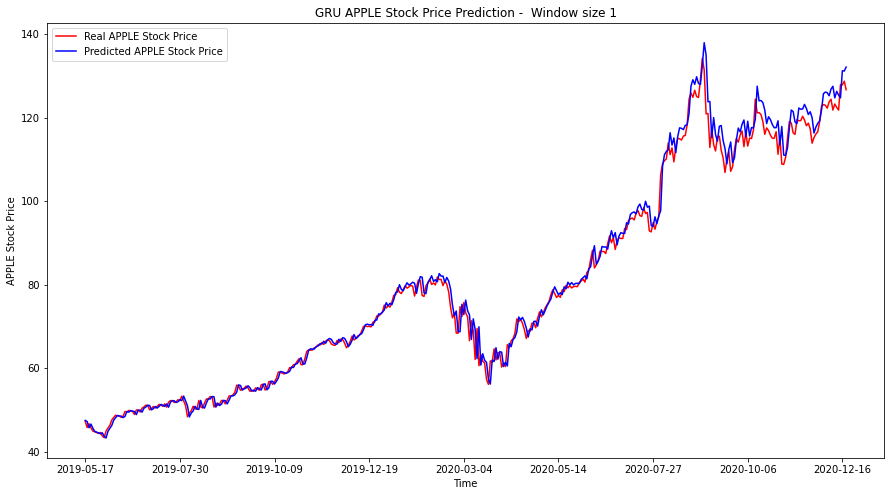

In [ ]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU APPLE Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

1.6268390641926274

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

2.4771296453274685

TCN 1

In [19]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train1.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 17s 8ms/step - loss: 0.0665
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 11/100
25/25 [==============================] - 0s 6ms/step - loss: 8.5324e-04
Epoch 12/100
25/25 [==============================] - 0s 6ms/step - loss: 7.6675e-04
Epoch 13/100
25/25 [========

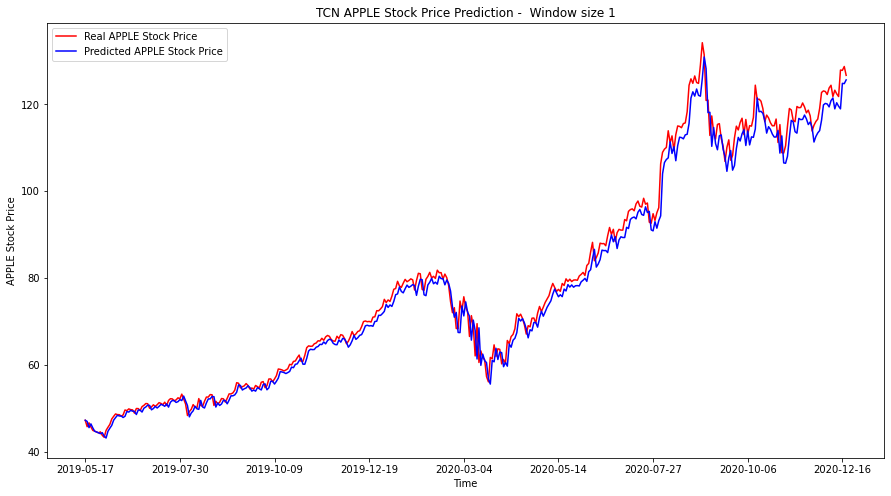

In [20]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN APPLE Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [21]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

1.9915804587244834

In [22]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

2.715037672268136

GRU 30

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train30.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 30, batch_size = 32)

Epoch 1/30
25/25 [==============================] - 2s 8ms/step - loss: 0.0227
Epoch 2/30
25/25 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 3/30
25/25 [==============================] - 0s 8ms/step - loss: 3.7203e-04
Epoch 4/30
25/25 [==============================] - 0s 8ms/step - loss: 3.4065e-04
Epoch 5/30
25/25 [==============================] - 0s 8ms/step - loss: 3.0662e-04
Epoch 6/30
25/25 [==============================] - 0s 8ms/step - loss: 3.0214e-04
Epoch 7/30
25/25 [==============================] - 0s 8ms/step - loss: 3.9521e-04
Epoch 8/30
25/25 [==============================] - 0s 8ms/step - loss: 2.9590e-04
Epoch 9/30
25/25 [==============================] - 0s 8ms/step - loss: 2.8039e-04
Epoch 10/30
25/25 [==============================] - 0s 8ms/step - loss: 4.5330e-04
Epoch 11/30
25/25 [==============================] - 0s 8ms/step - loss: 3.4393e-04
Epoch 12/30
25/25 [==============================] - 0s 8ms/step - loss: 3.7075e-04
Epoch 13/

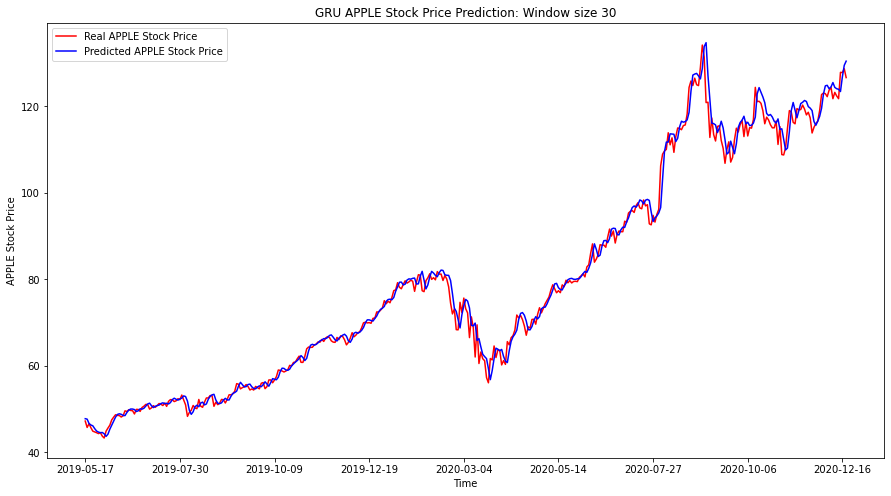

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU APPLE Stock Price Prediction: Window size 30')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

1.4679177242858732

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

2.2138905435067127

TCN 30

In [23]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train30.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 2s 9ms/step - loss: 2.6397
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1336
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0502
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0456
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0286
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0216
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0149
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 11/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 12/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 13/100
25/25 [=================

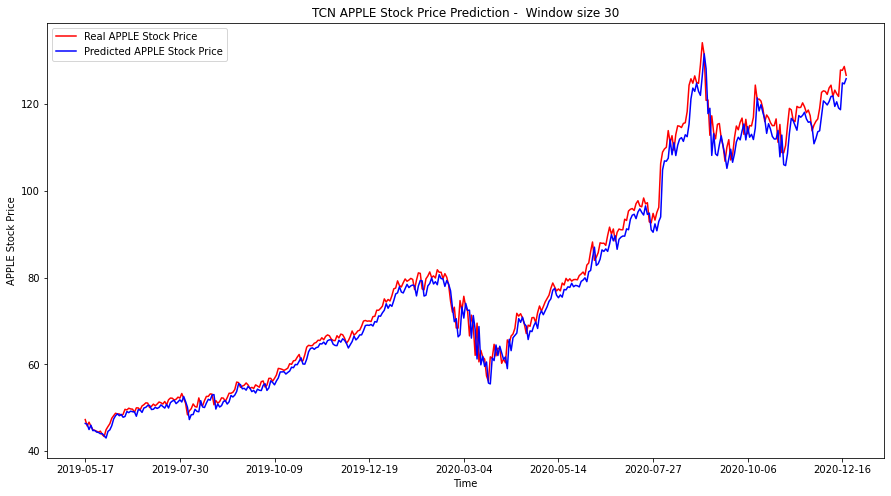

In [25]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN APPLE Stock Price Prediction -  Window size 30')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [26]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

2.0600999241419338

In [27]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

2.7637996404669325

GRU 60

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train60.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 30, batch_size = 32)

Epoch 1/30
33/33 [==============================] - 2s 13ms/step - loss: 0.0484
Epoch 2/30
33/33 [==============================] - 0s 13ms/step - loss: 7.8048e-04
Epoch 3/30
33/33 [==============================] - 0s 13ms/step - loss: 6.2604e-04
Epoch 4/30
33/33 [==============================] - 0s 13ms/step - loss: 6.2320e-04
Epoch 5/30
33/33 [==============================] - 0s 13ms/step - loss: 5.9216e-04
Epoch 6/30
33/33 [==============================] - 0s 13ms/step - loss: 5.3074e-04
Epoch 7/30
33/33 [==============================] - 0s 13ms/step - loss: 5.8728e-04
Epoch 8/30
33/33 [==============================] - 0s 13ms/step - loss: 5.5257e-04
Epoch 9/30
33/33 [==============================] - 0s 13ms/step - loss: 6.2062e-04
Epoch 10/30
33/33 [==============================] - 0s 13ms/step - loss: 5.7728e-04
Epoch 11/30
33/33 [==============================] - 0s 13ms/step - loss: 5.5672e-04
Epoch 12/30
33/33 [==============================] - 0s 13ms/step - loss: 5.93

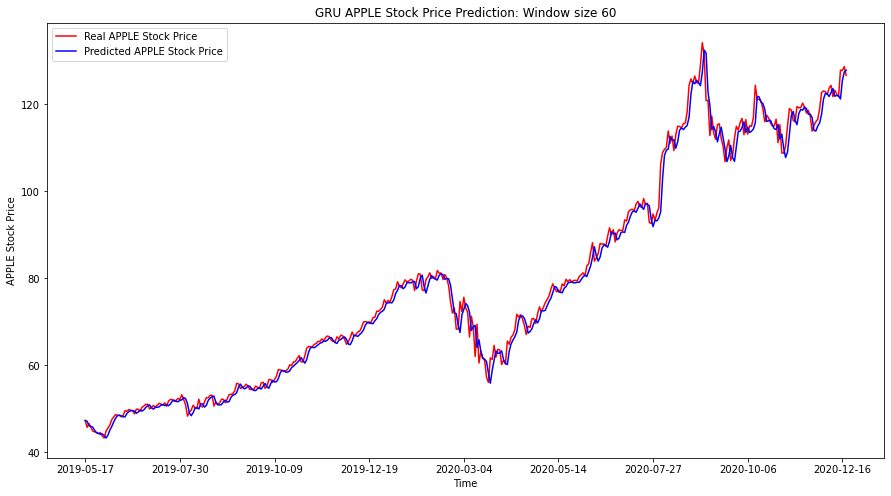

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU APPLE Stock Price Prediction: Window size 60')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

1.4857871162563727

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

2.177457453538476

TCN 60

In [28]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train60.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 2s 8ms/step - loss: 22.2620
Epoch 2/100
33/33 [==============================] - 0s 7ms/step - loss: 0.3261
Epoch 3/100
33/33 [==============================] - 0s 7ms/step - loss: 0.1438
Epoch 4/100
33/33 [==============================] - 0s 7ms/step - loss: 0.1335
Epoch 5/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0922
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0863
Epoch 7/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0529
Epoch 8/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0564
Epoch 9/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0544
Epoch 10/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0404
Epoch 11/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0381
Epoch 12/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0298
Epoch 13/100
33/33 [================

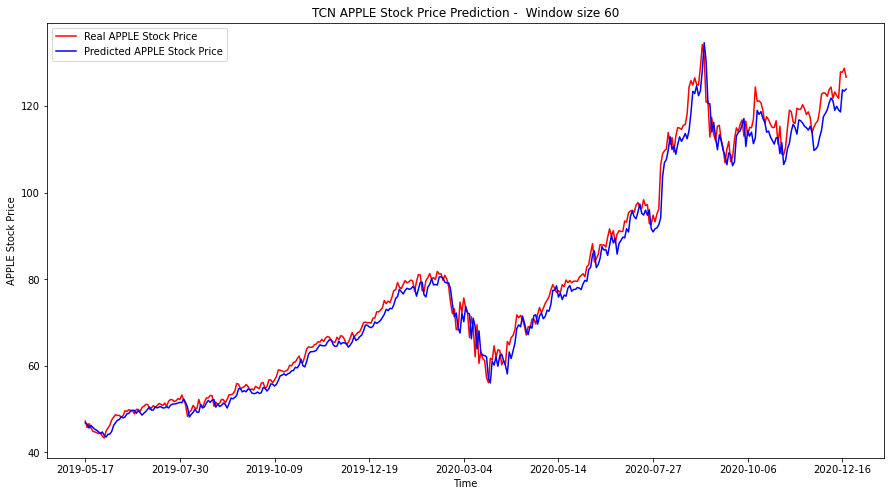

In [33]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN APPLE Stock Price Prediction -  Window size 60')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [34]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

2.1311274957296593

In [35]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

2.8371296996395876

GRU 90

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train90.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
23/23 [==============================] - 2s 19ms/step - loss: 0.0220
Epoch 2/30
23/23 [==============================] - 0s 18ms/step - loss: 6.6932e-04
Epoch 3/30
23/23 [==============================] - 0s 18ms/step - loss: 3.2845e-04
Epoch 4/30
23/23 [==============================] - 0s 18ms/step - loss: 3.2721e-04
Epoch 5/30
23/23 [==============================] - 0s 18ms/step - loss: 3.5571e-04
Epoch 6/30
23/23 [==============================] - 0s 17ms/step - loss: 3.6059e-04
Epoch 7/30
23/23 [==============================] - 0s 18ms/step - loss: 3.2277e-04
Epoch 8/30
23/23 [==============================] - 0s 18ms/step - loss: 3.4013e-04
Epoch 9/30
23/23 [==============================] - 0s 18ms/step - loss: 3.1453e-04
Epoch 10/30
23/23 [==============================] - 0s 18ms/step - loss: 3.4398e-04
Epoch 11/30
23/23 [==============================] - 0s 18ms/step - loss: 3.2214e-04
Epoch 12/30
23/23 [==============================] - 0s 18ms/step - loss: 3.16

In [ ]:
predicted_stock_price = model.predict(X_test90)



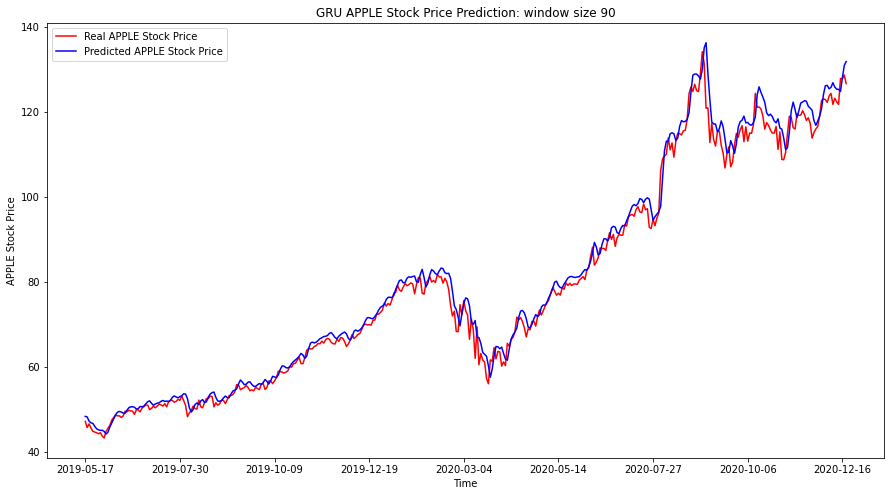

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU APPLE Stock Price Prediction: window size 90')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

1.8974003665507957

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))

In [ ]:
rmse

2.6566704282811653

TCN 90


In [40]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=5, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train90.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 2s 10ms/step - loss: 4.8471
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1160
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0605
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0352
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0247
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0229
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0158
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0151
Epoch 9/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0132
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0117
Epoch 11/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 12/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 13/100
23/23 [================

In [2]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN APPLE Stock Price Prediction -  Window size 90')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show()

NameError: ignored

In [1]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

NameError: ignored

In [44]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

2.3533140020390597